# Data Analysis

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fitparse import FitFile

## Load Data

### Find Files

In [3]:
path = "path_1"
acc_file = None
gps_file = None
for f in os.listdir(path):
    if f.endswith(".csv"):
        acc_file = f
    if f.endswith(".FIT"):
        gps_file = f

# Acceleration data
acc_data = pd.read_csv(path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# GPS data

def semicircles2rad(list):
    """Convert semicircle data from FIT file to dms data

    Args:
        list (list): List of semicircle values

    Returns:
        list: list of dms values
    """
    const = 180 / 2**31
    for i in range(len(list)-1):
        list[i] = list[i] * const
    return list


time = []
alt = []
lat = []
long = []
units = {"alt" : "", "lat": "", "long": ""}

gps_fit_file = fitfile = FitFile(path + "/" + gps_file)

for record in fitfile.get_messages("record"):
    for record_data in record:
        if record_data.name == "timestamp":
            time.append(record_data.value)
        if record_data.name == "altitude":
            alt.append(record_data.value)
            if units["alt"] == "":
                units["alt"] = record_data.units
        if record_data.name == "position_lat":
            lat.append(record_data.value)
            if units["lat"] == "":
                units["lat"] = record_data.units
        if record_data.name == "position_long":
            long.append(record_data.value)
            if units["long"] == "":
                units["long"] = record_data.units

lat = semicircles2rad(lat)
long = semicircles2rad(long)
gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "alt", "lat", "long"])


## Acceleration Data

In [4]:
acc_data

,time,ax,ay,az,norm
0,11:41:59:3080,"0,0578","0,4279","0,9532","1,046"
1,11:41:59:3110,"0,0640","0,4199","0,9443","1,035"
2,11:41:59:3130,"0,0734","0,4136","0,9332","1,023"
3,11:41:59:3150,"0,0761","0,4122","0,9277","1,017"
4,11:41:59:3180,"0,0715","0,4173","0,9261","1,018"
...,...,...,...,...,...
29800,12:14:18:5010,"0,0176","0,5329","0,8640","1,017"
29801,12:14:18:5100,"0,0177","0,5344","0,8529","1,008"
29802,12:14:18:5140,"0,0177","0,5307","0,8460","1,000"
29803,12:14:18:5170,"0,0195","0,5317","0,8454","1,000"


In [5]:
acc_data.describe()

,time,ax,ay,az,norm
count,29805,29805,29805,29805,29805
unique,29805,5109,5021,4865,830
top,11:41:59:3080,"0,0433","0,0903","1,0095","1,018"
freq,1,34,36,44,291


In [6]:
# acc_data.hist(column="ax")

In [7]:
acc_data.isna().sum()

time    0
ax      0
ay      0
az      0
norm    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

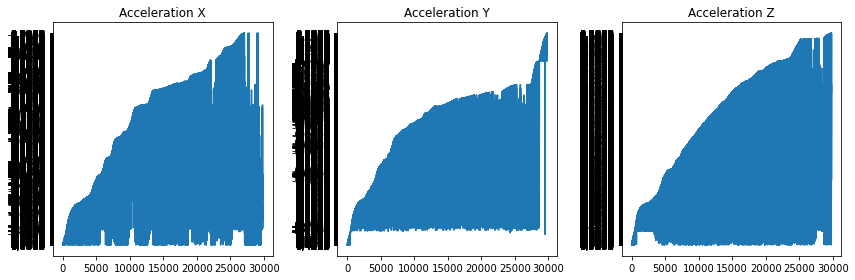

In [8]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

## GPS Data

In [9]:
gps_data

,time,alt,lat,long
0,2023-02-28 10:42:06,4.839350e+01,7.407720e+00,268.6
1,2023-02-28 10:42:34,4.839355e+01,7.407710e+00,268.6
2,2023-02-28 10:42:35,4.839357e+01,7.407720e+00,268.6
3,2023-02-28 10:42:37,4.839360e+01,7.407749e+00,268.6
4,2023-02-28 10:42:39,4.839362e+01,7.407803e+00,268.6
...,...,...,...,...
1472,2023-02-28 11:13:35,4.857185e+01,7.736515e+00,149.0
1473,2023-02-28 11:13:42,4.857196e+01,7.736392e+00,148.0
1474,2023-02-28 11:13:45,4.857199e+01,7.736398e+00,148.0
1475,2023-02-28 11:13:55,4.857200e+01,7.736381e+00,148.0


In [10]:
units # Check if data has been converted when loading

{'alt': 'm', 'lat': 'semicircles', 'long': 'semicircles'}

In [11]:
gps_data.describe()

,alt,lat,long
count,1.477000e+03,1.477000e+03,1477.000000
mean,3.923887e+05,6.249817e+04,183.435206
std,1.507832e+07,2.401624e+06,28.159797
min,4.838618e+01,7.407710e+00,148.000000
25%,4.841861e+01,7.484723e+00,162.200000
50%,4.849791e+01,7.562225e+00,177.200000
75%,4.852658e+01,7.675723e+00,192.400000
max,5.794865e+08,9.229862e+07,268.600000


In [12]:
gps_data.isna().sum()

time    0
alt     0
lat     0
long    0
dtype: int64

## Tests

In [26]:
import gmplot
import os

mymap = gmplot.GoogleMapPlotter(48.57, 7.75, 16)
# mymap.plot()
mymap.draw("map.html")
os.system("/home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html")

sh: 1: /home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html: Permission denied


32256

In [27]:
import gmplot
import os

# os.chdir(os.path.dirname(os.path.abspath(__file__)))

min_lat, max_lat = min(gps_data["lat"]), max(gps_data["lat"])
min_lon, max_lon = min(gps_data["long"]), max(gps_data["long"])
mymap = gmplot.GoogleMapPlotter(48.57, 7.75, 16)
# mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2,
#                                 min_lon + (max_lon - min_lon) / 2,
#                                 16)
mymap.plot(gps_data["lat"], gps_data["long"], "blue", edge_width=1)
mymap.draw("map.html")
os.system("/home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html")

sh: 1: /home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html: Permission denied


32256

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


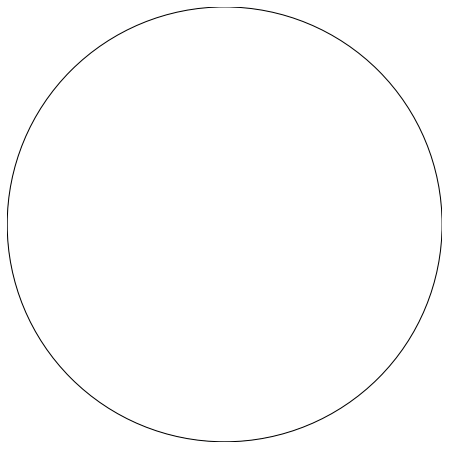

In [28]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(8, 8))
m = Basemap(projection="ortho", resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)